## Detection of Mines using sonar signal data under sea

### Importing required libraries and loading the dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
#reading the dataset
def read_dataset():
    df = pd.read_csv('sonar.all-data')
    X = df[df.columns[0:60]].values
    y = df[df.columns[60]]
    
    #Encoding the dependent variable
    encoder = LabelEncoder()
    encoder.fit(y)
    y = encoder.transform(y)
    Y = one_hot_encode(y)
    print(X.shape)
    return (X, Y)

In [3]:
#Define the encoder function
def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels, n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode

In [4]:
X, Y = read_dataset()

(207, 60)


### As our dataset is not randomly distributed, we have to shuffle the dataset in order to make sure the data is randomly distributed

In [5]:
#shuffling the dataset
X, Y = shuffle(X, Y, random_state = 1)

### Splitting the dataset into training and test dataset

In [6]:
#splitting the dataset into train and test set
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.2, random_state = 415)

### Defining the model hyper parameters

In [7]:
#defining the hyperparameters to train the model
learning_rate = 0.3
training_epochs = 1000
cost_history = np.empty(shape=[1], dtype = float)
n_dim = X.shape[1]
print("n_dim", n_dim)
n_class = 2
model_path = tf.python_io.TFRecordWriter(r"C:\Users\Mourya\restorerockversusmine.ipynb")

n_dim 60


### Defining number of hidden layers,weights and biases

In [8]:
#defining number of layers of our Neural Network
n_hidden_1 = 60
n_hidden_2 = 60
n_hidden_3 = 60
n_hidden_4 = 60
out = []

x = tf.placeholder(tf.float32, [None, n_dim])
W = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32, [None, n_class])

#defining the model
def multilayer_perceptron(x, weights, biases):
    
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    leyer_1 = tf.nn.sigmoid(layer_1)
    
    #Hidden layer
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.sigmoid(layer_2)
    
    #Next hidden layer
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.sigmoid(layer_3)
    
    #Next hidden layer with ReLu
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    layer_4 = tf.nn.relu(layer_4)
    
    #output layer with linear activation
    out_layer = tf.add(tf.matmul(layer_4, weights['out']), biases['out'])
    return out_layer

#define weights and biases for each layer
weights = {
    'h1': tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_4, n_class]))
}

biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_class]))
}

In [9]:
#initialize the variables
init = tf.global_variables_initializer()

In [10]:
#Saving the model
saver = tf.train.Saver()

In [11]:
#Calling the defined model
y = multilayer_perceptron(x, weights, biases)

In [12]:
#Define the cost function and optimizer
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y, labels = y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [13]:
#Creating a session and running it
sess = tf.Session()
sess.run(init)

epoch :  0 - cost: 0.04765847  - MSE: 6.183295968604361 -Train accuracy: 0.9878788
epoch :  1 - cost: 0.09624337  - MSE: 6.379677176359456 -Train accuracy: 0.969697
epoch :  2 - cost: 0.19097158  - MSE: 7.2173060328609635 -Train accuracy: 0.93939394
epoch :  3 - cost: 0.94192433  - MSE: 10.092665468671902 -Train accuracy: 0.6787879
epoch :  4 - cost: 4.652103  - MSE: 38.73413195887744 -Train accuracy: 0.55151516
epoch :  5 - cost: 1.48349  - MSE: 2.603369875766547 -Train accuracy: 0.45454547
epoch :  6 - cost: 0.63212514  - MSE: 1.261036816060469 -Train accuracy: 0.45454547
epoch :  7 - cost: 0.5994705  - MSE: 1.146632345973156 -Train accuracy: 0.46666667
epoch :  8 - cost: 0.56996876  - MSE: 1.1331478136440107 -Train accuracy: 0.4909091
epoch :  9 - cost: 0.5460182  - MSE: 1.057890478185271 -Train accuracy: 0.7939394
epoch :  10 - cost: 0.5236707  - MSE: 1.02880527952194 -Train accuracy: 0.8121212
epoch :  11 - cost: 0.50414187  - MSE: 1.0370341193205344 -Train accuracy: 0.8121212
epo

epoch :  98 - cost: 0.41651666  - MSE: 1.3744437370116471 -Train accuracy: 0.8060606
epoch :  99 - cost: 0.3561397  - MSE: 1.590826861116761 -Train accuracy: 0.8424242
epoch :  100 - cost: 0.2830978  - MSE: 2.100895393555059 -Train accuracy: 0.92727274
epoch :  101 - cost: 0.22665246  - MSE: 2.988446969834733 -Train accuracy: 0.92727274
epoch :  102 - cost: 0.18194392  - MSE: 3.3806448392959654 -Train accuracy: 0.95757574
epoch :  103 - cost: 0.15171945  - MSE: 3.9358373262925817 -Train accuracy: 0.96363634
epoch :  104 - cost: 0.12801535  - MSE: 4.232940265639682 -Train accuracy: 0.969697
epoch :  105 - cost: 0.09083981  - MSE: 4.68196678484576 -Train accuracy: 0.9818182
epoch :  106 - cost: 0.068759724  - MSE: 4.779891691593003 -Train accuracy: 0.9939394
epoch :  107 - cost: 0.060274992  - MSE: 5.145572290706912 -Train accuracy: 0.9939394
epoch :  108 - cost: 0.054562807  - MSE: 5.389923988713882 -Train accuracy: 0.9939394
epoch :  109 - cost: 0.050302535  - MSE: 5.710792259959765 -T

epoch :  198 - cost: 0.0070099975  - MSE: 13.480741204180353 -Train accuracy: 1.0
epoch :  199 - cost: 0.006942515  - MSE: 13.532591797321299 -Train accuracy: 1.0
epoch :  200 - cost: 0.0068760794  - MSE: 13.584140010378814 -Train accuracy: 1.0
epoch :  201 - cost: 0.006810707  - MSE: 13.635590481201953 -Train accuracy: 1.0
epoch :  202 - cost: 0.006746376  - MSE: 13.686695785613594 -Train accuracy: 1.0
epoch :  203 - cost: 0.006683099  - MSE: 13.737701769926757 -Train accuracy: 1.0
epoch :  204 - cost: 0.0066208094  - MSE: 13.788360480640346 -Train accuracy: 1.0
epoch :  205 - cost: 0.006559557  - MSE: 13.838899177398677 -Train accuracy: 1.0
epoch :  206 - cost: 0.0064992644  - MSE: 13.889296083287588 -Train accuracy: 1.0
epoch :  207 - cost: 0.0064400006  - MSE: 13.939508171718593 -Train accuracy: 1.0
epoch :  208 - cost: 0.0063818768  - MSE: 13.98752443973647 -Train accuracy: 1.0
epoch :  209 - cost: 0.0063246833  - MSE: 14.03559939307691 -Train accuracy: 1.0
epoch :  210 - cost: 0.

epoch :  299 - cost: 0.0033736995  - MSE: 17.524997106711105 -Train accuracy: 1.0
epoch :  300 - cost: 0.0033547813  - MSE: 17.55731520474555 -Train accuracy: 1.0
epoch :  301 - cost: 0.00333604  - MSE: 17.589505122862235 -Train accuracy: 1.0
epoch :  302 - cost: 0.003318667  - MSE: 17.62157246829705 -Train accuracy: 1.0
epoch :  303 - cost: 0.0033007252  - MSE: 17.641644840407903 -Train accuracy: 1.0
epoch :  304 - cost: 0.0032830986  - MSE: 17.673243810199367 -Train accuracy: 1.0
epoch :  305 - cost: 0.0032650519  - MSE: 17.70561505804929 -Train accuracy: 1.0
epoch :  306 - cost: 0.003247734  - MSE: 17.737614333785476 -Train accuracy: 1.0
epoch :  307 - cost: 0.0032300928  - MSE: 17.76792626201028 -Train accuracy: 1.0
epoch :  308 - cost: 0.0032129989  - MSE: 17.799575986681766 -Train accuracy: 1.0
epoch :  309 - cost: 0.0031957843  - MSE: 17.82962055604395 -Train accuracy: 1.0
epoch :  310 - cost: 0.0031789313  - MSE: 17.86102080273818 -Train accuracy: 1.0
epoch :  311 - cost: 0.003

epoch :  400 - cost: 0.0021411965  - MSE: 20.236514221085383 -Train accuracy: 1.0
epoch :  401 - cost: 0.0021333522  - MSE: 20.260844799431766 -Train accuracy: 1.0
epoch :  402 - cost: 0.002125422  - MSE: 20.285990614882074 -Train accuracy: 1.0
epoch :  403 - cost: 0.0021177628  - MSE: 20.309794007821814 -Train accuracy: 1.0
epoch :  404 - cost: 0.0021099106  - MSE: 20.33457539001235 -Train accuracy: 1.0
epoch :  405 - cost: 0.0021023725  - MSE: 20.35922456498264 -Train accuracy: 1.0
epoch :  406 - cost: 0.0020946593  - MSE: 20.382635378705082 -Train accuracy: 1.0
epoch :  407 - cost: 0.0020876734  - MSE: 20.407111619112616 -Train accuracy: 1.0
epoch :  408 - cost: 0.00208017  - MSE: 20.422652732666496 -Train accuracy: 1.0
epoch :  409 - cost: 0.0020727406  - MSE: 20.447629062044278 -Train accuracy: 1.0
epoch :  410 - cost: 0.002065314  - MSE: 20.471168552141222 -Train accuracy: 1.0
epoch :  411 - cost: 0.0020579225  - MSE: 20.49563242930953 -Train accuracy: 1.0
epoch :  412 - cost: 0.

epoch :  501 - cost: 0.0015561339  - MSE: 22.363825566032535 -Train accuracy: 1.0
epoch :  502 - cost: 0.0015517656  - MSE: 22.383286617429295 -Train accuracy: 1.0
epoch :  503 - cost: 0.0015474372  - MSE: 22.40280836297585 -Train accuracy: 1.0
epoch :  504 - cost: 0.0015432615  - MSE: 22.422157337009075 -Train accuracy: 1.0
epoch :  505 - cost: 0.0015393122  - MSE: 22.436295108539145 -Train accuracy: 1.0
epoch :  506 - cost: 0.0015350266  - MSE: 22.455886618557034 -Train accuracy: 1.0
epoch :  507 - cost: 0.0015307813  - MSE: 22.475308706991353 -Train accuracy: 1.0
epoch :  508 - cost: 0.0015265851  - MSE: 22.494753199637834 -Train accuracy: 1.0
epoch :  509 - cost: 0.0015224486  - MSE: 22.514897754173774 -Train accuracy: 1.0
epoch :  510 - cost: 0.0015182574  - MSE: 22.534130096968013 -Train accuracy: 1.0
epoch :  511 - cost: 0.0015140966  - MSE: 22.55318998109586 -Train accuracy: 1.0
epoch :  512 - cost: 0.0015103404  - MSE: 22.566223046205444 -Train accuracy: 1.0
epoch :  513 - cos

epoch :  602 - cost: 0.0012109339  - MSE: 24.10028301419366 -Train accuracy: 1.0
epoch :  603 - cost: 0.0012082144  - MSE: 24.117177803682118 -Train accuracy: 1.0
epoch :  604 - cost: 0.001205449  - MSE: 24.133328446334684 -Train accuracy: 1.0
epoch :  605 - cost: 0.001202764  - MSE: 24.15005181566722 -Train accuracy: 1.0
epoch :  606 - cost: 0.0012001026  - MSE: 24.16605370461115 -Train accuracy: 1.0
epoch :  607 - cost: 0.0011976024  - MSE: 24.17741634871409 -Train accuracy: 1.0
epoch :  608 - cost: 0.0011948596  - MSE: 24.193354787319684 -Train accuracy: 1.0
epoch :  609 - cost: 0.0011922107  - MSE: 24.209564671359235 -Train accuracy: 1.0
epoch :  610 - cost: 0.0011895244  - MSE: 24.226096316499248 -Train accuracy: 1.0
epoch :  611 - cost: 0.0011868615  - MSE: 24.24190520246765 -Train accuracy: 1.0
epoch :  612 - cost: 0.0011842472  - MSE: 24.25834766705772 -Train accuracy: 1.0
epoch :  613 - cost: 0.0011816117  - MSE: 24.274306969971807 -Train accuracy: 1.0
epoch :  614 - cost: 0.0

epoch :  703 - cost: 0.0009836005  - MSE: 25.58597204444708 -Train accuracy: 1.0
epoch :  704 - cost: 0.0009817495  - MSE: 25.5999098373707 -Train accuracy: 1.0
epoch :  705 - cost: 0.0009798404  - MSE: 25.613424781641644 -Train accuracy: 1.0
epoch :  706 - cost: 0.0009781297  - MSE: 25.627832472472203 -Train accuracy: 1.0
epoch :  707 - cost: 0.0009762895  - MSE: 25.637203070576614 -Train accuracy: 1.0
epoch :  708 - cost: 0.0009744396  - MSE: 25.652067168299016 -Train accuracy: 1.0
epoch :  709 - cost: 0.00097258587  - MSE: 25.66613205259892 -Train accuracy: 1.0
epoch :  710 - cost: 0.0009707253  - MSE: 25.680619924023425 -Train accuracy: 1.0
epoch :  711 - cost: 0.0009689185  - MSE: 25.6944837703629 -Train accuracy: 1.0
epoch :  712 - cost: 0.000967048  - MSE: 25.708972321377836 -Train accuracy: 1.0
epoch :  713 - cost: 0.0009653708  - MSE: 25.722738654595283 -Train accuracy: 1.0
epoch :  714 - cost: 0.00096357905  - MSE: 25.731437439830795 -Train accuracy: 1.0
epoch :  715 - cost: 

epoch :  804 - cost: 0.0008238975  - MSE: 26.875385729786743 -Train accuracy: 1.0
epoch :  805 - cost: 0.0008225718  - MSE: 26.88689254754021 -Train accuracy: 1.0
epoch :  806 - cost: 0.00082122424  - MSE: 26.900182078090086 -Train accuracy: 1.0
epoch :  807 - cost: 0.00081989705  - MSE: 26.911569321825255 -Train accuracy: 1.0
epoch :  808 - cost: 0.00081856747  - MSE: 26.92457423942515 -Train accuracy: 1.0
epoch :  809 - cost: 0.00081723416  - MSE: 26.93718451998918 -Train accuracy: 1.0
epoch :  810 - cost: 0.000815945  - MSE: 26.949096116185583 -Train accuracy: 1.0
epoch :  811 - cost: 0.000814654  - MSE: 26.957395447371916 -Train accuracy: 1.0
epoch :  812 - cost: 0.000813361  - MSE: 26.969905574473685 -Train accuracy: 1.0
epoch :  813 - cost: 0.0008120329  - MSE: 26.981995175025197 -Train accuracy: 1.0
epoch :  814 - cost: 0.0008107433  - MSE: 26.994603827317373 -Train accuracy: 1.0
epoch :  815 - cost: 0.00080942636  - MSE: 27.006542706877575 -Train accuracy: 1.0
epoch :  816 - co

epoch :  905 - cost: 0.00070666755  - MSE: 28.01309577215756 -Train accuracy: 1.0
epoch :  906 - cost: 0.00070568256  - MSE: 28.024269619904835 -Train accuracy: 1.0
epoch :  907 - cost: 0.0007047115  - MSE: 28.031346950297472 -Train accuracy: 1.0
epoch :  908 - cost: 0.00070370507  - MSE: 28.042477498866067 -Train accuracy: 1.0
epoch :  909 - cost: 0.000702711  - MSE: 28.054141109660446 -Train accuracy: 1.0
epoch :  910 - cost: 0.00070169516  - MSE: 28.064213312218232 -Train accuracy: 1.0
epoch :  911 - cost: 0.00070072594  - MSE: 28.075840698353733 -Train accuracy: 1.0
epoch :  912 - cost: 0.00069970445  - MSE: 28.086037735986597 -Train accuracy: 1.0
epoch :  913 - cost: 0.00069873425  - MSE: 28.097043575260905 -Train accuracy: 1.0
epoch :  914 - cost: 0.0006977298  - MSE: 28.107583413392543 -Train accuracy: 1.0
epoch :  915 - cost: 0.00069675484  - MSE: 28.118583698930088 -Train accuracy: 1.0
epoch :  916 - cost: 0.0006957643  - MSE: 28.12909755449855 -Train accuracy: 1.0
epoch :  91

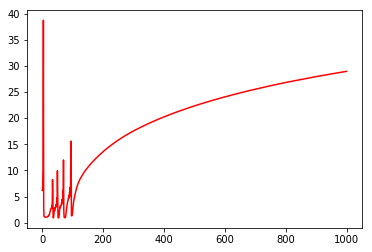

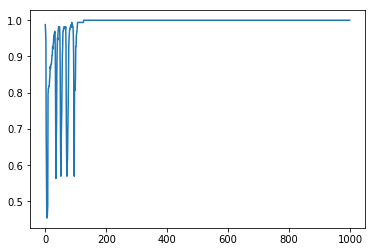

In [15]:
#caluclating the cost and accuracy for each epoch
mse_history = []
accuracy_history = []

for epoch in range(training_epochs):
    sess.run(training_step, feed_dict={x:train_x, y_:train_y})
    cost = sess.run(cost_function, feed_dict={x:train_x,y_:train_y})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    pred_y = sess.run(y, feed_dict={x:test_x})
    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    mse_= sess.run(mse)
    mse_history.append(mse_)
    accuracy = (sess.run(accuracy, feed_dict={x:train_x, y_:train_y}))
    accuracy_history.append(accuracy)
    
    print('epoch : ', epoch, '-','cost:', cost, " - MSE:", mse_, "-Train accuracy:",accuracy)


#plot MSE and accuracy graph
plt.plot(mse_history, 'r')
plt.show()
plt.plot(accuracy_history)

In [17]:
#print the final accuracy
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Test accuracy:", (sess.run(accuracy, feed_dict={x:test_x,y_:test_y})))

Test accuracy: 0.9047619


In [19]:
#print the final mean square error
pred_y = sess.run(y,feed_dict={x:test_x})
mse = tf.reduce_mean(tf.square(pred_y-test_y))
print("MSE: %.4f" % sess.run(mse))

MSE: 28.9554


### Using our classification model built on top of Tensorflow API we achieved 90% of accuracy.